# Analytics Evaluation - Task 1 (by Wong Jiong Soon)


In [2]:
#Import the required libraries to run
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv('ingredient.csv')

In [4]:
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [5]:
data.tail()

,a,b,c,d,e,f,g,h,i
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.0,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22
213,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.0,0.00


In [6]:
#Doing descriptive statistics
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [10]:
#Display data infos ( rows, if null values, data types)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [8]:
#Display data shapes in terms of rows and columns
data.shape

(214, 9)

Summary:
1. There are no missing values to be found.
2. All the features are containing numerical values.

# 1.a Decriptive Analysis of the addictives (Including summaries of findings, correlation and ANOVA)



In [17]:
#Display the number of numerical variables
var_no = [var for var in data.columns]

print('Total No of Numerical Variables', len(var_no))

Total No of Numerical Variables 9


In [26]:
#Calculate the mean for each numerical column
def ingredients_mean(column):
    print(f"{round(column.mean(),2)}")

for var in var_no:
    if var == var_no[0]:
        print(f"Mean")
    ingredients_mean(data[var])

Mean
1.52
13.41
2.68
1.44
72.65
0.5
8.96
0.18
0.06


In [27]:
#Calculate the median for each numerical column
def ingredients_median(column):
    print(f"{round(column.median(),2)}")

for var in var_no:
    if var == var_no[0]:
        print(f"Median")
    ingredients_median(data[var])

Median
1.52
13.3
3.48
1.36
72.79
0.56
8.6
0.0
0.0


In [28]:
#Calculate the variance for every numerical column
def ingredients_variance(column):
    print(f"{round(column.var(),2)}")

for var in var_no:
    if var == var_no[0]:
        print(f"Variance")
    ingredients_variance(data[var])

Variance
0.0
0.67
2.08
0.25
0.6
0.43
2.03
0.25
0.01


In [30]:
#Calculate the standard deviation for every numerical column
def ingredients_std_dev(column):
    print(f"{round(column.std(),2)}")

for var in var_no:
    if var == var_no[0]:
        print(f"Standard deviation")
    ingredients_std_dev(data[var])

Standard deviation
0.0
0.82
1.44
0.5
0.77
0.65
1.42
0.5
0.1


# Summary (1.a)


1. Mean and median are both relatively close means the data set has relatively symmetrical distribution.
2. By comparing variance and standard deviation, only the third row which is c and seventh row g have higher value than 1.

# 1.b Graphical Analysis of the additives (Including distribution study)                                       

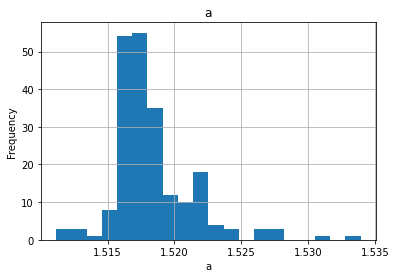

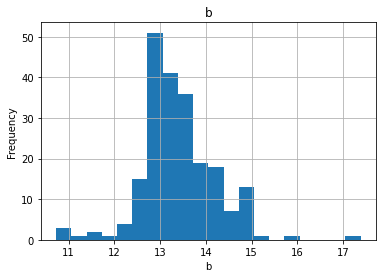

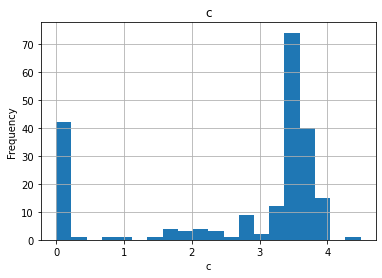

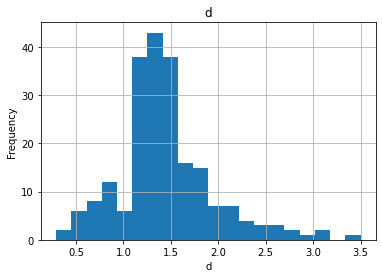

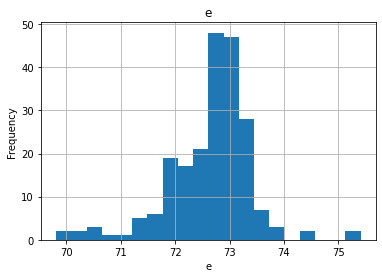

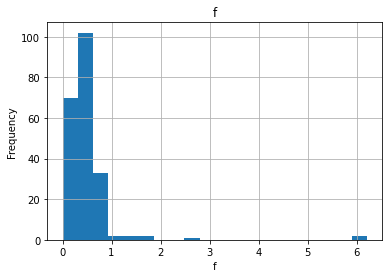

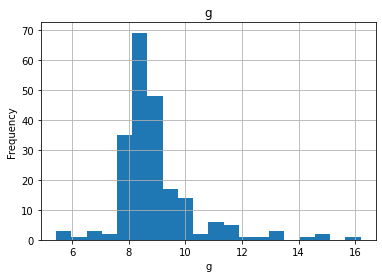

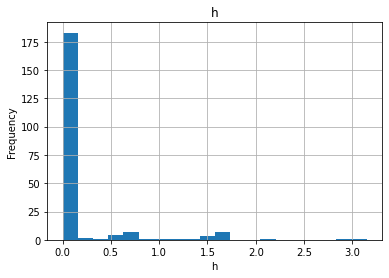

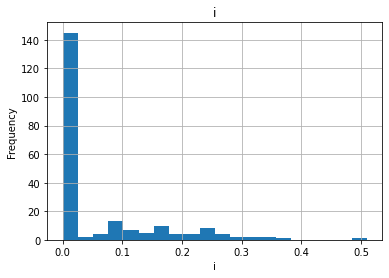

In [39]:
#Since this case is continuous variables, analyse the distribution as follow, display the distribution for each variables.
def continuous_analysis(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Frequency')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in var_no:
    continuous_analysis(data, var)

In [40]:
#Do the scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    sns.set()
    cols = data.columns
    sns.pairplot(data[cols], size = 8.5)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


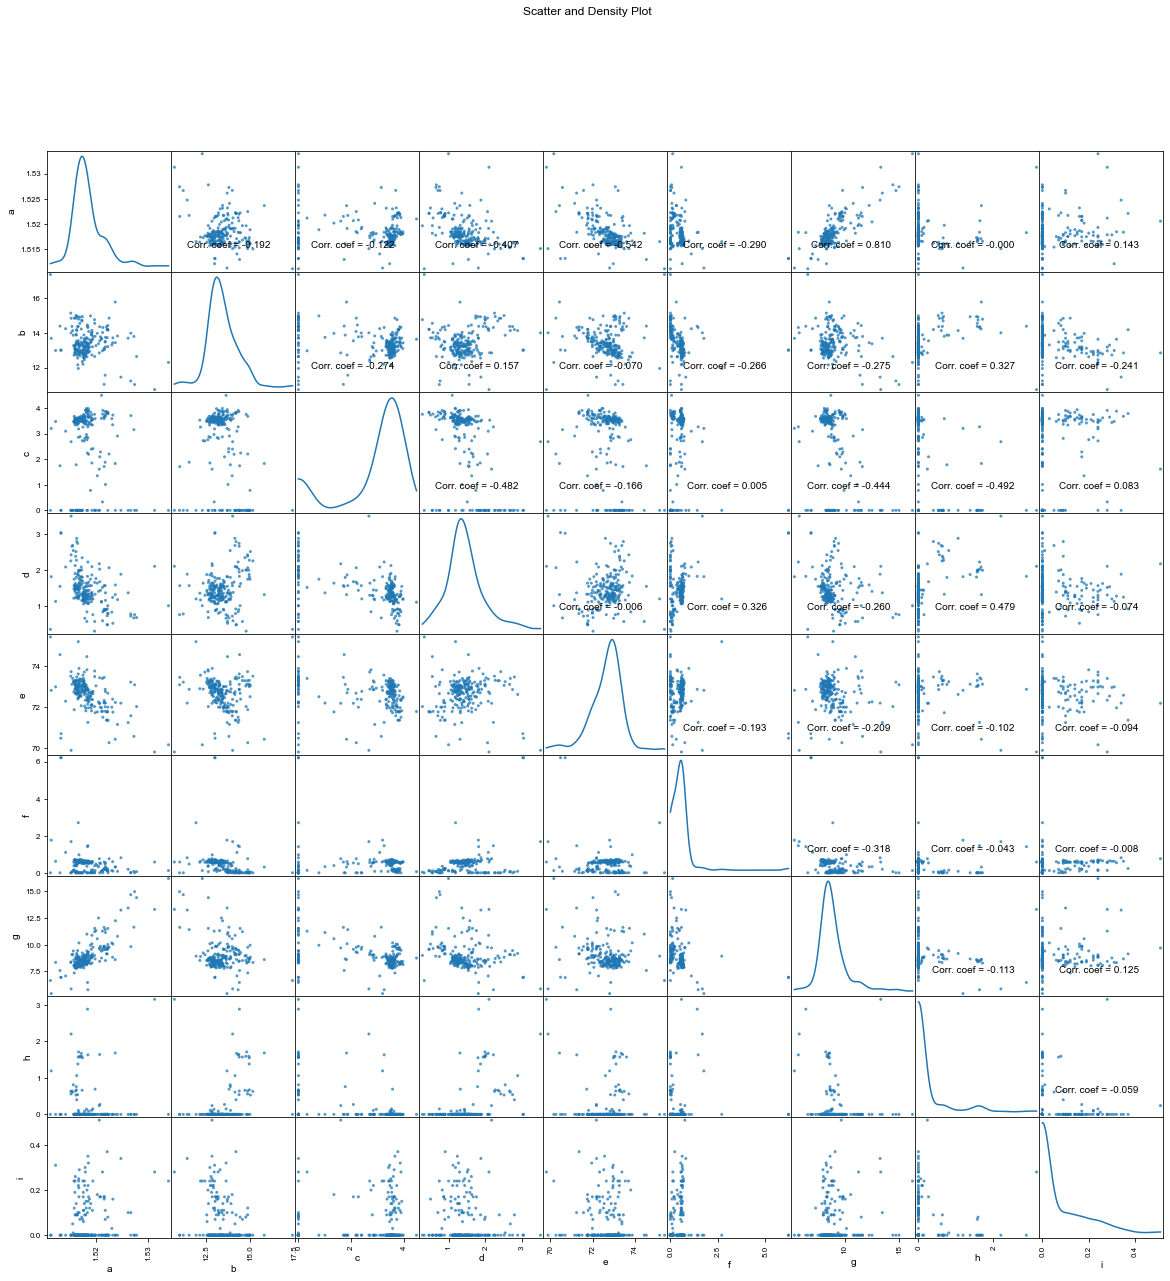

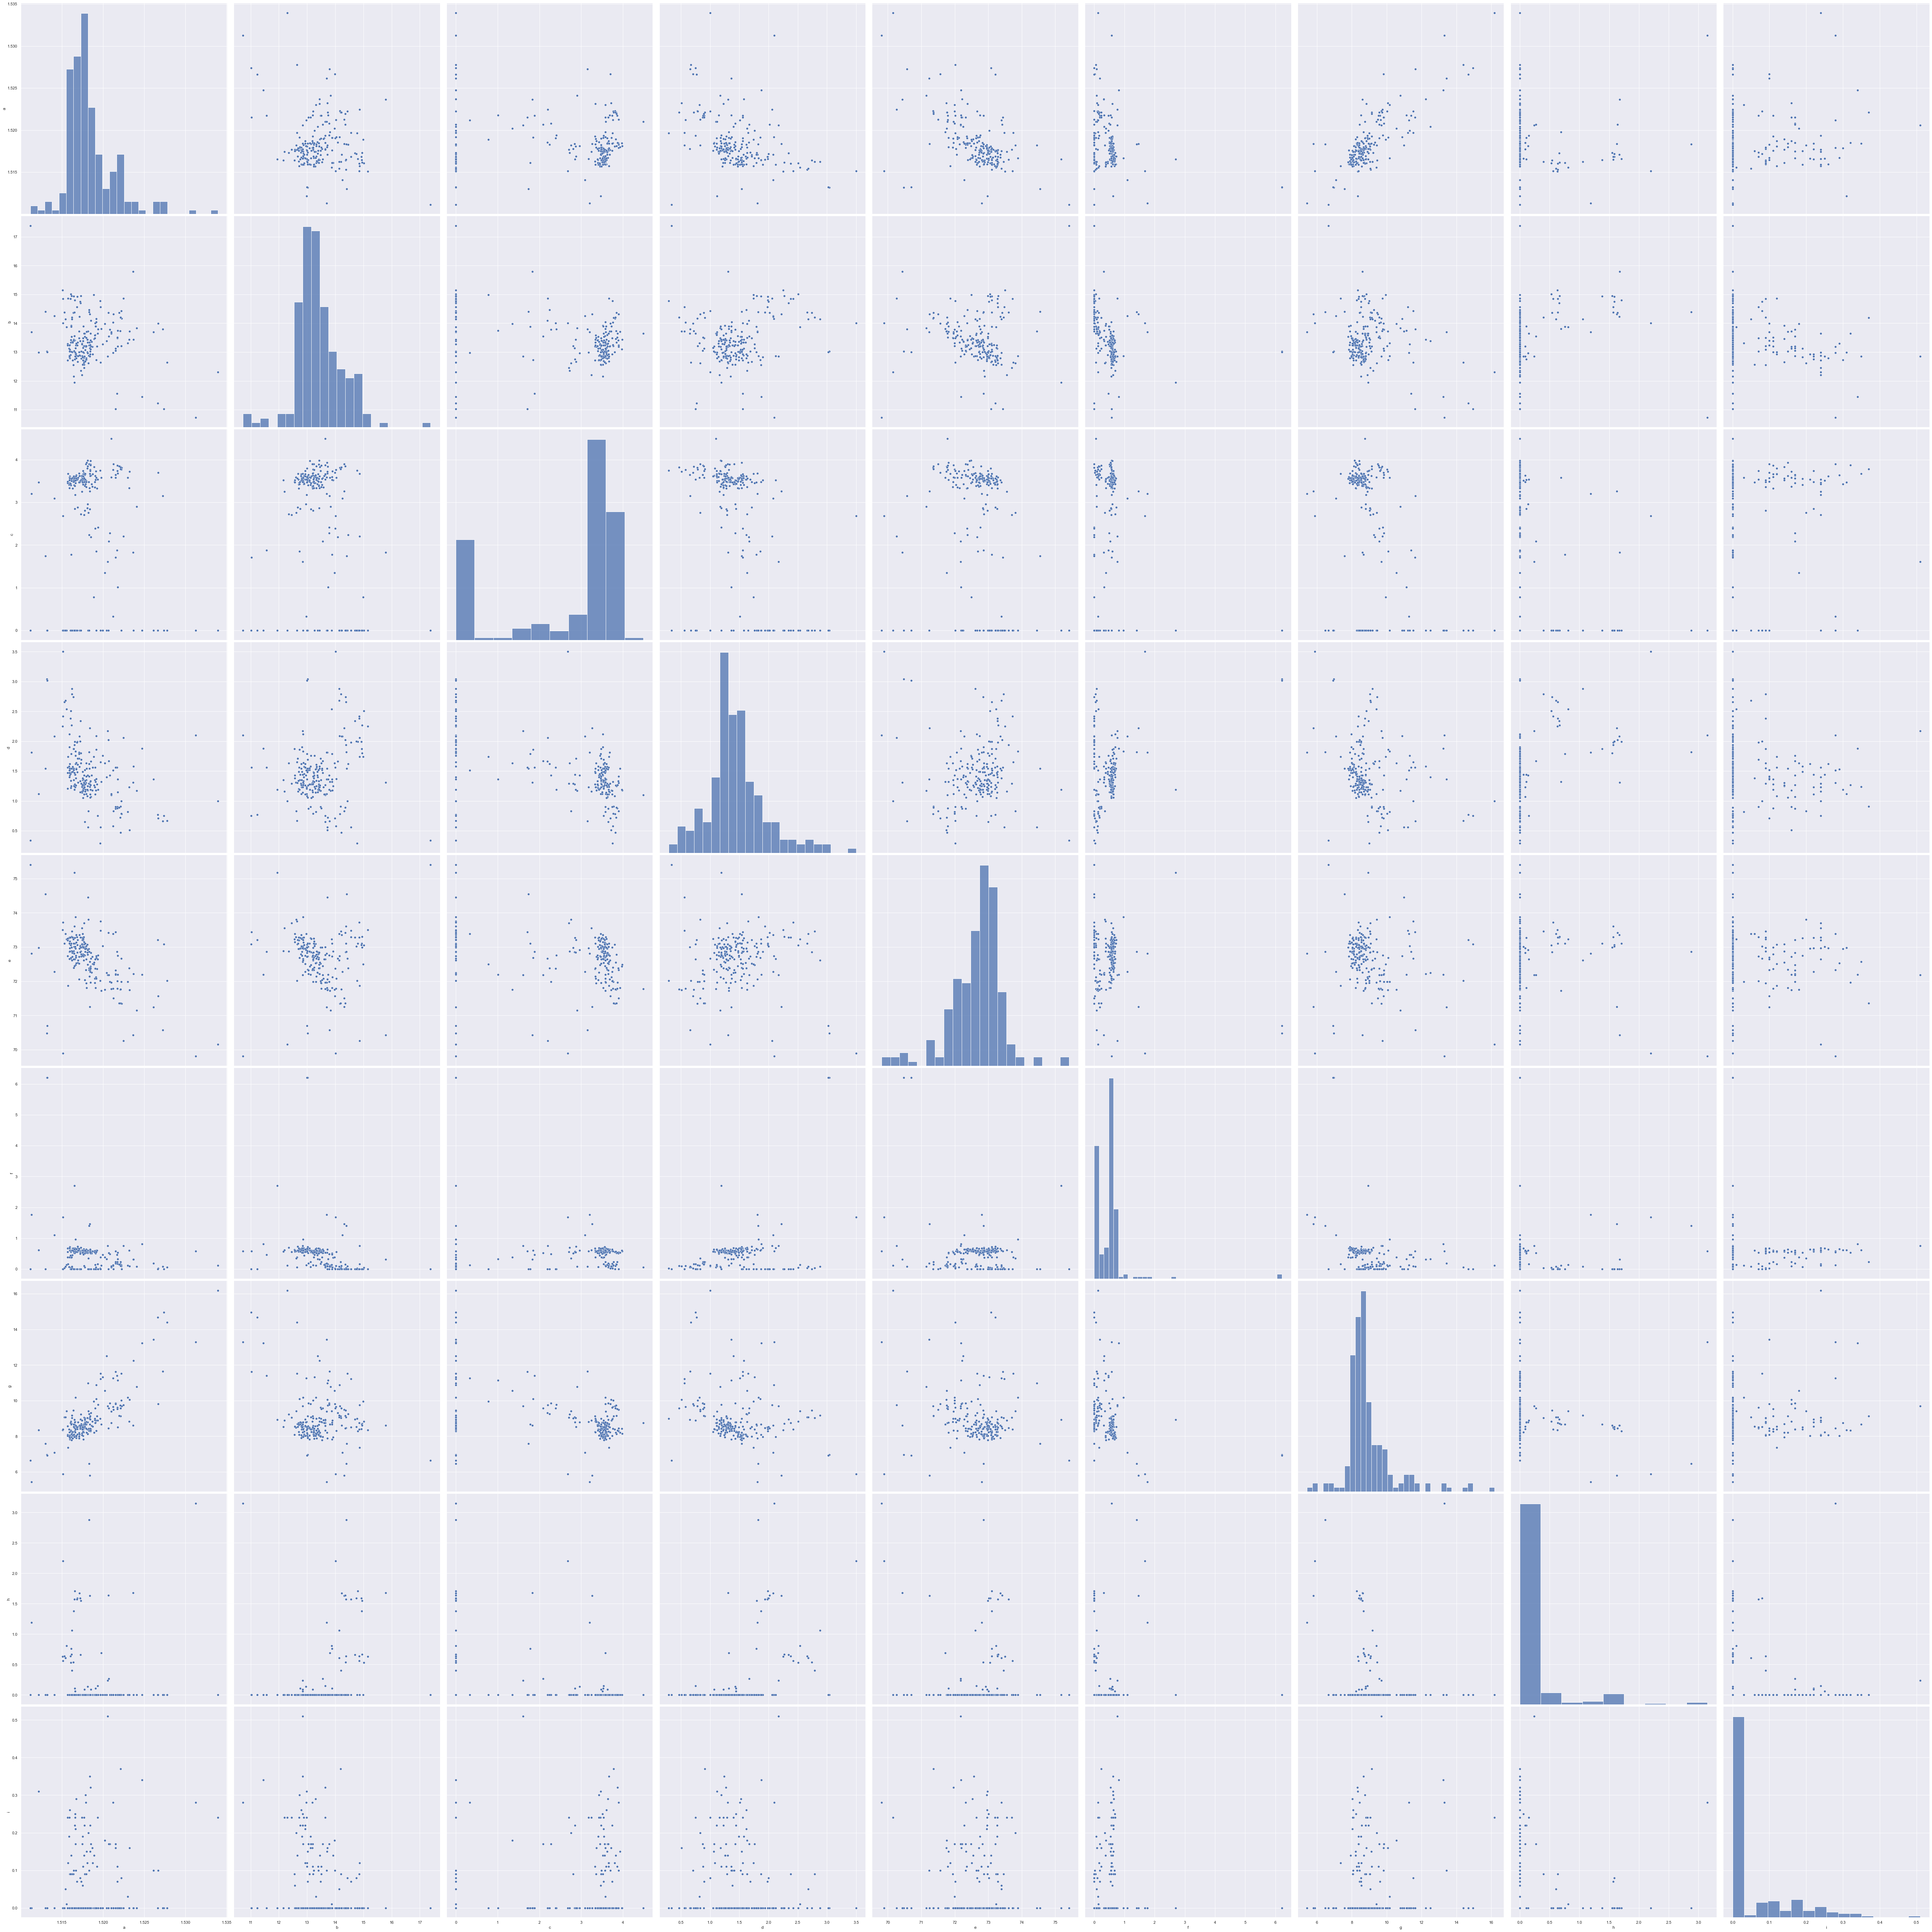

In [41]:
plotScatterMatrix(data, 20, 10)

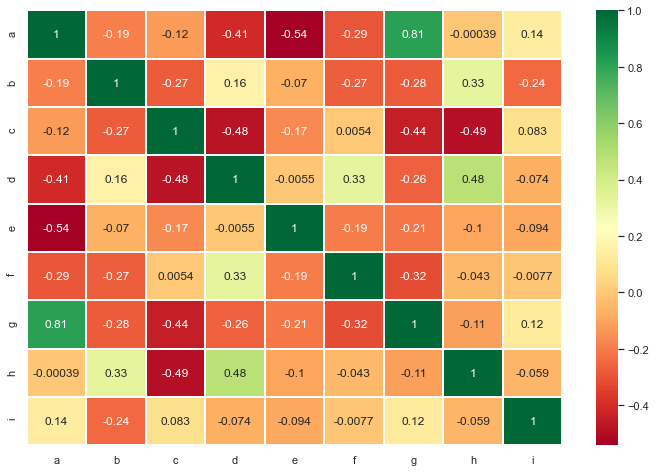

In [42]:
#Applying heatmap to visualize the coeffictient correlation between variables
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

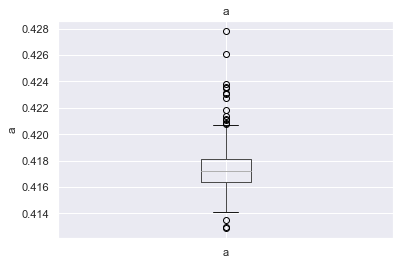

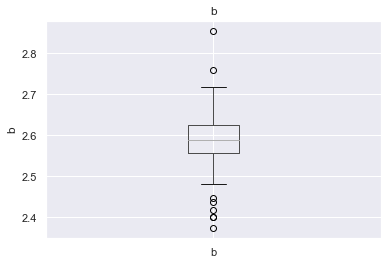

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


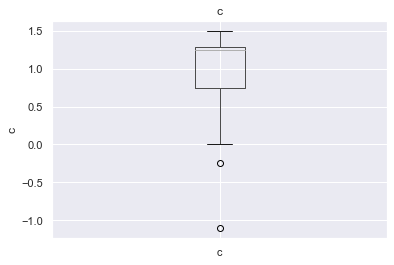

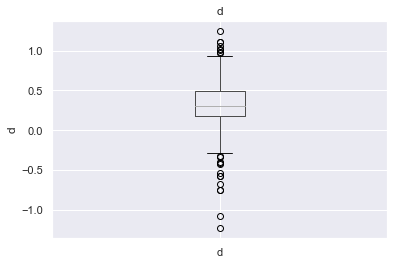

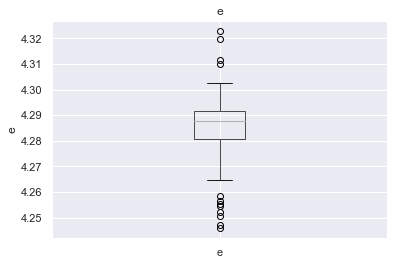

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


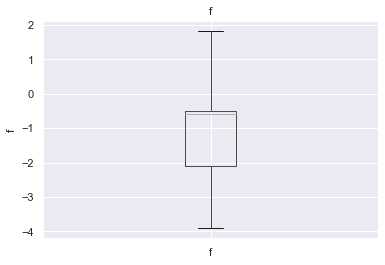

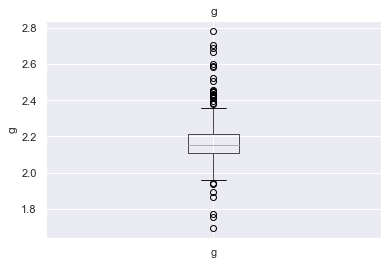

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


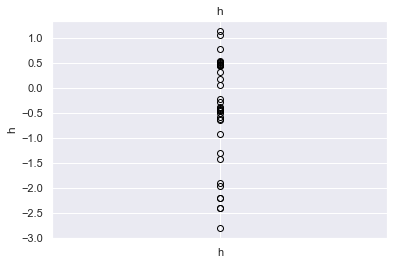

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1129: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


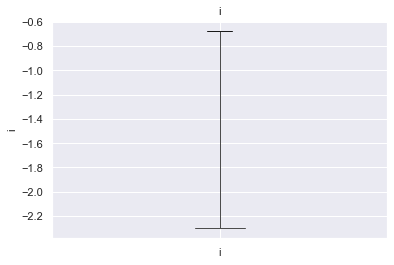

In [57]:
# Visualize outliers with box and whisker plot for continuous variables

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, and also need to eliminates those zero elements in the array 
    df[var] = np.log(df[var])
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in var_no:
    find_outliers(data, var)

# Summary (1.b)

1. From Scatter and Density plot, it is important to note c, f, h and i are not normally distributed as others and heavily skewed.
2. From the heatmap, the green region for a & g indicating 0.81 which is close to 1 means high positive correlation means if one increases, the other increases as well in similar behaviour.
3. From the heatmap, the red region for very high negative correlation coefficient such as e & a (-0.54) , d & c (-0.48), h & c (--0.49), implying when one increases , the another variable will decreases vice versa.
4. From the results, it can be obeserved that a,b,c,d,e,g has some box and whisker plot and some outliers outside the plot whereas f,h,i are so heavily skewed that the box and whisker method cannot be applied on them.

# 1.c A clustering test of your choice (unsupervised learning) to determine the distinctive number of formulations in the dataset.


First, I would like to test out the hierachical(dendrogram) clustering method

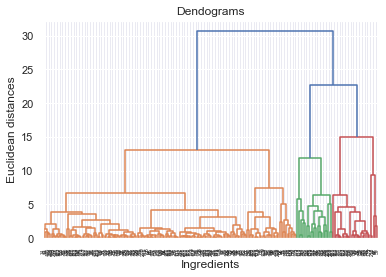

In [64]:
X = data.copy()

# Use dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable linkage is actually the algorithm itself of hierarchical clustering and 
#then in linkage we have to specify on which data we apply and engage. This is X dataset

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendograms')
plt.xlabel('Ingredients')
plt.ylabel('Euclidean distances')
plt.show()

Second, I would propose doing Elbow Method (heuristic approaches)

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

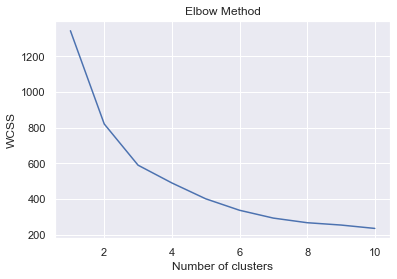

In [69]:
#While applying elbow method, wcss is the sum of squared distance between each point and the centroid in a cluster.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Summary(1.c)

1. In order to determine the distinctive number of formulations, I would propose using heuristic approaches such as  hierachical(dendrogram) clustering method and elbow method.
2. From the dendrogram, the distinct 3 different colours with hierachy means there are 3 distinct number of clusters.
3. From the Elbow Method graph, to determine the optimal number of clusters, select the value of k at the "elbow" which is the point after the distortion/inertia start decreasing in a linear fashion, from the graph it would be 3 as well.